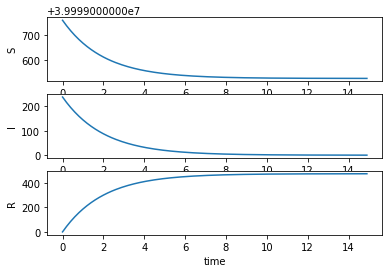

Text(0.5, 0, 'S')

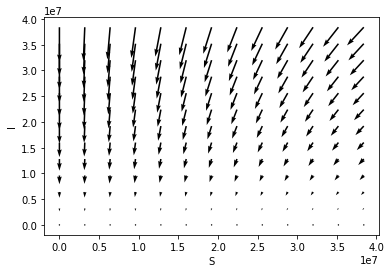

In [6]:
import matplotlib.pyplot  as plt
from numpy import array,zeros,arange
import numpy as np
def SIR(state,t):
    S=state[0]
    I=state[1]
    R=state[2]
    ds=-beta*S*I/Npop
    di=beta*S*I/Npop-gamma*I
    dr=gamma*I
    return array([ds,di,dr])
def SIRplot(S,I):
    ds=-beta*S*I/Npop
    di=beta*S*I/Npop-gamma*I
    #dr=gamma*I
    return array([ds,di])


def Runge_Kutta(y,t,dt,derivative):
    k1=dt*derivative(y,t)
    k2=dt*derivative(y+k1/2.,t+0.5*dt)
    k3=dt*derivative(y+k2/2.,t+0.5*dt)
    k4=dt*derivative(y+k3,t+dt)
    y_next=y+1/6.*(k1+2*k2+2*k3+k4)
    return y_next
global beta,gamma,Npop
beta=0.5
gamma=1
Npop=4*10**7
Io=238  # initial conditions
So=Npop-Io 
Ro=0
dt=0.1
to=0
te=15
t=arange(to,te,dt)
N=len(t)
y=zeros([N,3])
y[0,0]=So
y[0,1]=Io
y[0,2]=Ro

for i in range(N-1):
    y[i+1]=Runge_Kutta(y[i],t[i],dt,SIR)

St=[y[j,0] for j in range(N)]
It=[y[j,1] for j in range(N)]
Rt=[y[j,2] for j in range(N)]
plt.subplot(3,1,1)
plt.plot(t,St)
plt.ylabel("S")
plt.xlabel("time")
plt.subplot(3,1,2)
plt.plot(t,It)
plt.ylabel("I")
plt.xlabel("time")
plt.subplot(3,1,3)
plt.plot(t,Rt)
plt.ylabel("R")
plt.xlabel("time")
plt.show()
XS=arange(0,Npop,0.08*Npop)
YI=arange(0,Npop,0.08*Npop)
XSm,YIm=np.meshgrid(XS,YI)
DS,DI=SIRplot(XSm,YIm)

plt.quiver(XSm,YIm,DS,DI)
plt.ylabel("I")
plt.xlabel("S")
#plt.show()